In [79]:
import numpy as np
import pandas as pd 
import math
import random as rm

# 状态空间
states = ["Sleep","Icecream","Run"]

# 可能的事件序列
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# 概率矩阵（转移矩阵）
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")


All is gonna be okay, you should move on!! ;)


In [80]:
# 实现了可以预测状态的马尔可夫模型的函数。
def activity_forecast(days):
    # 选择初始状态
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # 应该记录选择的状态序列。这里现在只有初始状态。
    activityList = [activityToday]
    i = 0
    # 计算 activityList 的概率
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# # 预测 2 天后的可能状态
activity_forecast(2)

Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3


In [81]:
def activity_forecast(days):
    # 选择初始状态
    activityToday = "Sleep"
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1    
    return activityList

# 记录每次的 activityList
list_activity = []
count = 0

# `range` 从第一个参数开始数起，一直到第二个参数（不包含）
for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))

# 查看记录到的所有 `activityList`    
#print(list_activity)

# 遍历列表，得到所有最终状态是跑步的 activityList
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# 计算从睡觉状态开始到跑步状态结束的概率
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")


The probability of starting at state:'Sleep' and ending at state:'Run'= 62.1%


In [82]:
from scipy.optimize import minimize
import numpy as np

def func(x):
    return 10.5 + 0.3 * x[0] + 0.32 * x[1] + 0.32 * x[2] + 0.0007 * x[0] ** 2 + 0.0004 * x[1] ** 2 + 0.00045 * x[2] ** 2
cons = ({'type':'eq','func':lambda x:x[0]+x[1]+x[2] - 700})
b1,b2,b3 = (100,200),(120,150),(150,300)
x0 = np.array([100,200,400])
res = minimize(func,x0,method='L-BFGS-B',bounds=(b1,b2,b3),constraints=cons)
print(res)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 149.785
        x: [ 1.000e+02  1.200e+02  1.500e+02]
      nit: 2
      jac: [ 4.400e-01  4.160e-01  4.550e-01]
     nfev: 12
     njev: 3
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


In [83]:
from sko.GA import GA
def func(x):
    return 10.5+0.3*x[0]+0.32*x[1]+0.32*x[2]+0.0007*x[0]**2+0.0004*x[1]**2+0.00045*x[2]**2
cons=lambda x: x[0]+x[1]+x[2]-700
b1,b2,b3=(100,200),(120,250),(150,30)
ga=GA(func=func,n_dim=3,size_pop=500,max_iter=500,constraint_eq=[cons],lb=[100,120,150],ub=[200,250,300])
best_x,best_y=ga.run()
print("best_x:\n",best_x,"best_y;\n",best_y)

ModuleNotFoundError: No module named 'sko'

In [ ]:
# 微分方程
from sympy import *
y = symbols('y', cls=Function)
x = symbols('x')
eq = Eq(y(x).diff(x,2)+4*y(x).diff(x,1)+29*y(x), 0)
fx = dsolve(eq,y(x))
print("原函数 f(x)：",fx)
C1=symbols('c1')
C2=symbols('c2')
f=(C1*sin(5*x) + C2*cos(5*x))*exp(-2*x)
print("一阶导 f'(x):", f.diff(x,1))# 后面那个参数代表几阶导

原函数 f(x)： Eq(y(x), (C1*sin(5*x) + C2*cos(5*x))*exp(-2*x))
一阶导 f'(x): -2*(c1*sin(5*x) + c2*cos(5*x))*exp(-2*x) + (5*c1*cos(5*x) - 5*c2*sin(5*x))*exp(-2*x)


d:\sodesktop_next_F\2022-Machine-Learning-Specialization-main\.venv\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


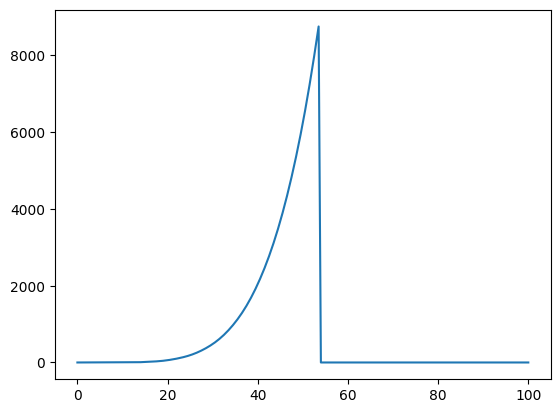

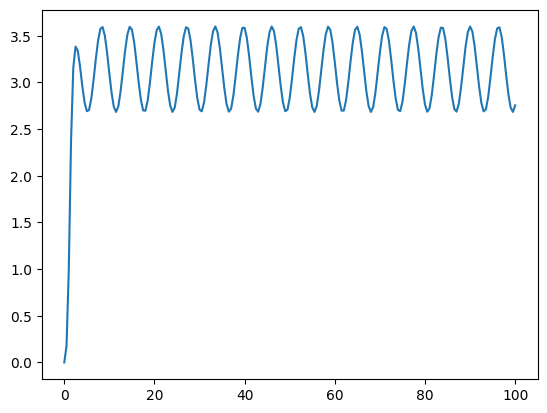

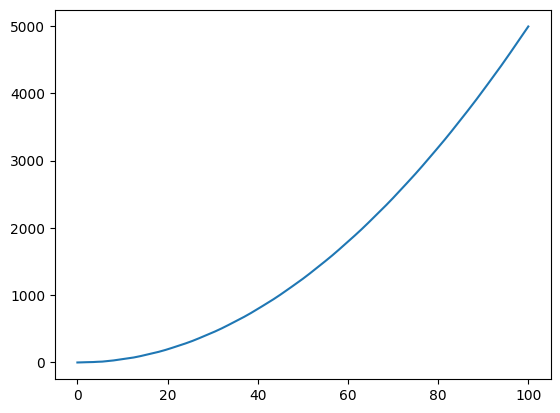

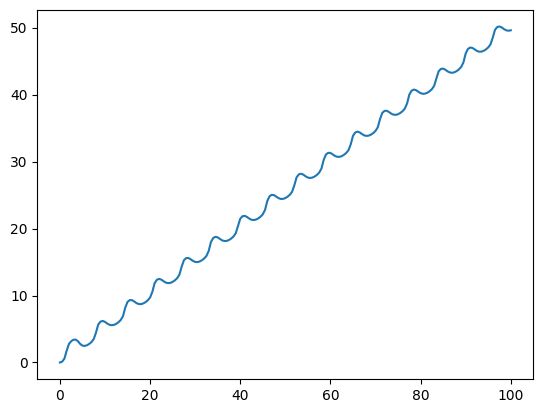

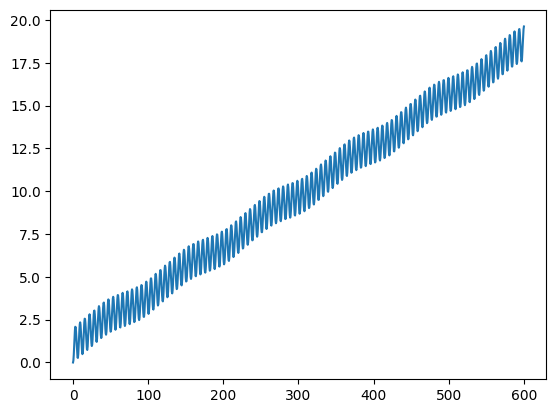

In [ ]:
# pip install sympy  //求解一阶微分方程
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import arange
from math import sin,exp
dy=lambda y,x:sin(x)+2*sin(y)+0.0001*x**4
x = arange(0,100.5,0.5)
sol=odeint(dy,0,x)
# print("x={}\n对应的数值解y={}".format(x,sol.T))
plt.plot(x,sol)
plt.show()
# import matplotlib.pyplot as plt
# from scipy import linspace,exp
# from scipy.integrate import odeint
# import numpy as np 
dy=lambda y,x:sin(x)+2*sin(y)
x = arange(0,100.5,0.5)
sol=odeint(dy,0,x)
# print("x={}\n对应的数值解y={}".format(x,sol.T))
plt.plot(x,sol)
plt.show()


dy=lambda y,x:sin(x)+2*sin(y)+x
x = arange(0,100.5,0.5)
sol=odeint(dy,0,x)
# print("x={}\n对应的数值解y={}".format(x,sol.T))
plt.plot(x,sol)
plt.show()


dy=lambda y,x:sin(x)+2*sin(y)**2
x = arange(0,100.5,0.5)
sol=odeint(dy,0,x)
# print("x={}\n对应的数值解y={}".format(x,sol.T))
plt.plot(x,sol)
plt.show()


dy=lambda y,x:-0.001*exp(2*sin(y+1212)**2)+sin(x)+2*sin(y)**2/200*exp(2*sin(y)**2)     +0.01*(sin(x+23)+2*sin(y)**2)
x = arange(0,600.5,0.5)
sol=odeint(dy,0,x)
# print("x={}\n对应的数值解y={}".format(x,sol.T))
plt.plot(x,sol)
plt.show()

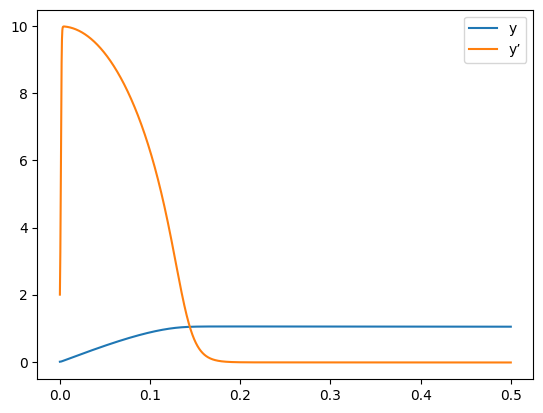

In [ ]:
import matplotlib.pyplot as plt
from scipy import linspace,exp
from scipy.integrate import odeint
import numpy as np
from numpy import arange


def fvdp(t,y):
    #要把y看出一个向量，y = [dye,dy1,dy2,...]分别表示y的n阶导，那么y[e]就是需要求解的函数，y[1]表示一阶导，y[2]表示二阶导，以此类推
    dy1 = y[1]# y[1]=dy/dt，一阶导
    dy2 = 1000 * (1-y[0]**2) * y[1] - 2 * y[0] - y[1]**4
    # y[]是最初始，也就是需要求解的函数”注意返回的顺序是[一阶导， 二阶导]，这就形成了一阶微分方程组
    
    return [dy1,dy2]


def solve_second_order_ode():   
    # 求解二阶ODE
    x= arange(0,0.5,0.0001)#给x规定范围
    y0 = [0.0,2.0]# 初值条件

    #初值[3.日，-5.0]表示y(e)=3,y"(0)=-5# 返回y，其中y[:,]是y[0]的值，就是最终解，y[:,1]是y'(x)的值
    y = odeint(fvdp, y0, x, tfirst=True)

    y1,=plt.plot(x,y[:,0],label='y')
    y1_1,= plt.plot(x,y[:,1],label='y’' )
    plt.legend(handles=[y1,y1_1])#创建图例
    plt.show()

solve_second_order_ode()

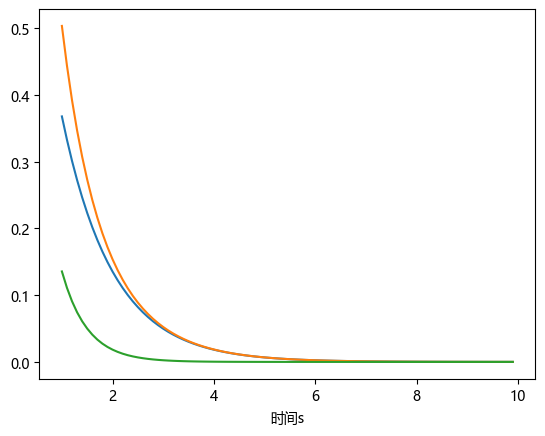

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
def fun(t, w):
    x = w[0]
    y = w[1]
    z = w[2]
    return [2*x-3*y+3*z,4*x-5*y+3*z,4*x-4*y+2*z]
# 初始条件
y0 =[1,2,1]
yy = solve_ivp(fun,(0,10), y0, method='RK45',t_eval = np.arange(1,10,0.1) )
t = yy.t
data = yy.y
plt.plot(t,data[0,:])
plt.plot(t,data[1,:])
plt.plot(t,data[2,:])
plt.xlabel("时间s")
plt.show()

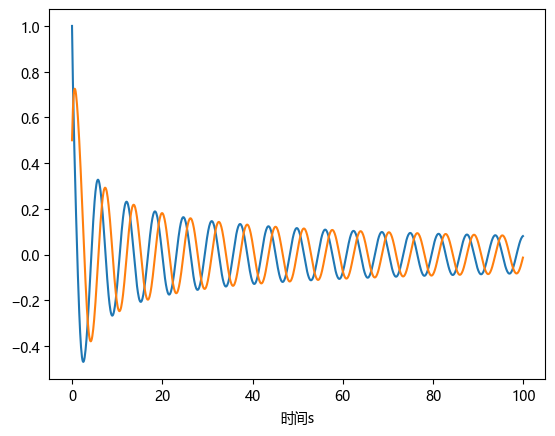

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
def fun(t, w):
    x = w[0]
    y = w[1]
    z = w[2]
    return [-x**3-y,-y**3+x,-z**3-y+x]
#初始条件
y0 = [1,0.5,0]
yy = solve_ivp(fun, (0,100), y0, method='RK45',t_eval = np.arange(0,100,0.1))
t = yy.t
data = yy.y
plt.plot(t, data[0, :])
plt.plot(t, data[1, :])
# plt.plot(t, data[2, :])
plt.xlabel("时间s")
plt.show()

lamda=0.2	mu=0.08	sigma=2.5	(1-1/sigma)=0.6


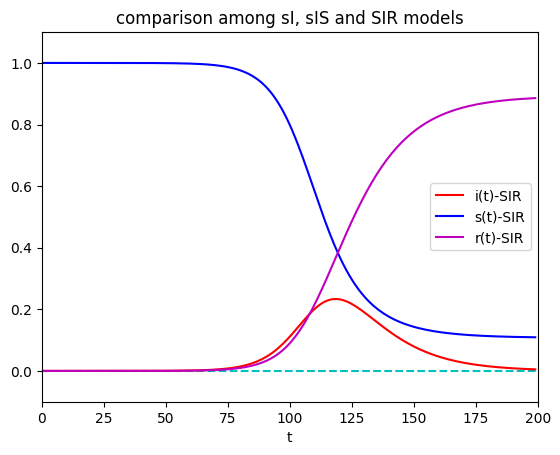

In [ ]:
from scipy.integrate import odeint # 导入 scipy.integrate 模块
import numpy as np # 导入 numpy包
import matplotlib.pyplot as plt # 导入 matplotlib包

def dySIR(y, t, lamda, mu): # SIR 模型，导数函数
    i, s = y
    di_dt = lamda*s*i - mu*i # di/dt = lamda*s*i-mu*i
    ds_dt = -lamda*s*i # ds/dt = -lamda*s*i
    return np.array([di_dt ,ds_dt])
#设置模型参数
number = 1e7 # 总人数
lamda = 0.2 # 日接触率，患病者每天有效接触的易感者的平均人数
sigma = 2.5 # 传染期接触数
mu = lamda/sigma # 日治愈率，每天被治愈的患病者人数占患病者总数的比例
fsig = 1-1/sigma
tEnd = 200 # 预测日期长度
t = np.arange(0.0,tEnd,1)# (start,stop,step)
i0 = 1e-6 # 患病者比例的初值
s0 = 1-i0# 易感者比例的初值
Y0 = (i0,s0)#微分方程组的初值
print("lamda={}\tmu={}\tsigma={}\t(1-1/sigma)={}".format(lamda,mu,sigma,fsig))
#SIR 模型
ySIR = odeint(dySIR, Y0, t, args=(lamda,mu))
#画图
plt.title("comparison among sI, sIS and SIR models")
plt.xlabel('t')
plt.axis([0,tEnd,-0.1,1.1])
plt.axhline(y=0,ls="--",c='c') # 添加水平直线
plt.plot(t,ySIR[:,0],'-r',label='i(t)-SIR')
plt.plot(t,ySIR[:,1],'-b',label='s(t)-SIR')
plt.plot(t,1-ySIR[:,0]-ySIR[:,1],'-m', label='r(t)-SIR')
plt.legend(loc='best') # youcans
plt.show()


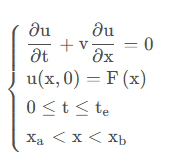

1. U/X = u(i+1,j) - u(i,j) / derta(x)
2. U/T = u(i,j+1) - u(i,j) / derta(t)

u(i,j+1) = u(i,j) - v * (dt/dx) * (u(i,j) - u(i+1,j))


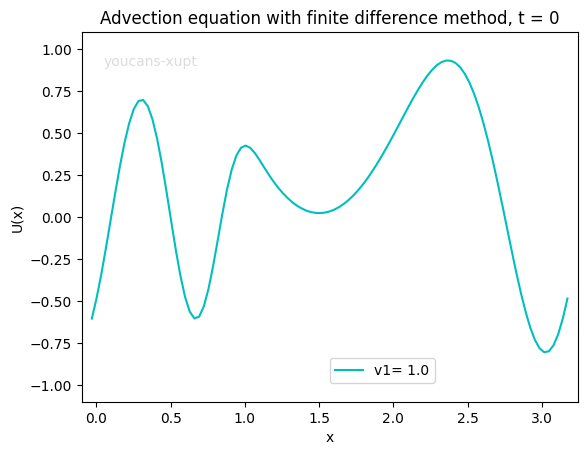

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 初始条件函数
def function0(x,p):
    u0 = np.sin(2 * (x - p) ** 2)
    return u0

# 输入参数
v1 = 1 # v
p = 0.5 # u(x,0) 

tStart,tEnd = 0,1.0 # 开始和结束时间
xa,xb,dt,nNodes = 0.0,np.pi,0.02,100 # 空间范围(xa，xb/)
# dt = 时间差分步长  # nNodes =  空间网格数

nSteps = round(tEnd/dt)
dx = (xb - xa) / nNodes # dx初始化
x = np.arange(xa - dx,xb + 2 * dx,dx) # x可能取值范围
ux0 = function0(x,p) # 初值

u,ujp= ux0.copy(),ux0.copy()  # u(j) # u(j + 1)

for i in range(nSteps):# 时域差分
    for j in range(nNodes + 2):# 计算u(j + 1)
        ujp[j] = u[j] - (v1* dt/dx) * (u[j] - u[j-1])
    
    # update 边界条件
    u = ujp.copy()
    u[0] = u[nNodes + 1]
    u[nNodes + 2] = u[1]

    # 画图
plt.plot(x,u,"c-", label = "v1= 1.0")
# plt.plot(u,x,"b-", label = "else")
plt.axis((xa-0.1,xb + 0.1,-1.1,1.1))
plt.xlabel("x")
plt.ylabel("U(x)")
plt.legend(loc=(0.5,0.05))
plt.title("Advection equation with finite difference method, t = %1.f" % (tStart + dt))
plt.text(0.05,0.9,"youcans-xupt",color='gainsboro')
plt.pause(0.001)
tStart += dt 

plt.show()      


dt = 0.01, dx = 0.02, dy = 0.02, r = 0.50


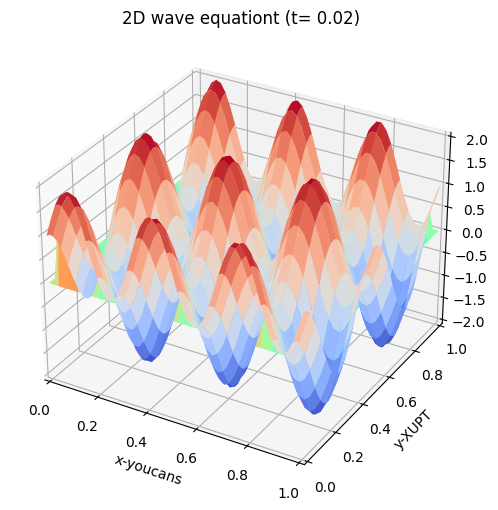

In [ ]:
# mathmodel13_v1.py
# Demo10 of mathematical modeling algorithm
# Solving partial differential equations
# 偏微分方程数值解法

# 4. 二维波动方程（双曲型二阶偏微分方程）
# p2u/pt2 = c^2*(p2u/px2+p2u/py2)

import numpy as np
import matplotlib.pyplot as plt

# 模型参数
c = 1.0  # 波的传播速率
tc, te = 0.0, 1.0  # 时间范围，0<t<te
xa, xb = 0.0, 1.0  # 空间范围，xa<x<xb
ya, yb = 0.0, 1.0  # 空间范围，ya<y<yb

# 初始化
c2 = c*c  # 方程参数
dt = 0.01  # 时间步长
dx = dy = 0.02  # 空间步长
tNodes = round(te/dt)  # t轴 时序网格数
xNodes = round((xb-xa)/dx)  # x轴 空间网格数
yNodes = round((yb-ya)/dy)  # y轴 空间网格数
tZone = np.arange(0, (tNodes+1)*dt, dt)  # 建立空间网格
xZone = np.arange(0, (xNodes+1)*dx, dx)  # 建立空间网格
yZone = np.arange(0, (yNodes+1)*dy, dy)  # 建立空间网格
xx, yy = np.meshgrid(xZone, yZone)  # 生成网格点的坐标 xx,yy (二维数组)

# 步长比检验(r>1 则算法不稳定)
r = 4 * c2 * dt*dt / (dx*dx+dy*dy)
print("dt = {:.2f}, dx = {:.2f}, dy = {:.2f}, r = {:.2f}".format(dt,dx,dy,r))
assert r < 1.0, "Error: r>1, unstable step ratio of dt2/(dx2+dy2) ."
rx = c*c * dt**2/dx**2
ry = c*c * dt**2/dy**2

# 绘图
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111, projection='3d')
# ax2 = fig.add_subplot(122, projection='3d')

# 计算初始值
U = np.zeros([tNodes+1, xNodes+1, yNodes+1])  # 建立三维数组
U[0] = np.sin(6*np.pi*xx)+np.cos(4*np.pi*yy)  # U[0,:,:]
U[1] = np.sin(6*np.pi*xx)+np.cos(4*np.pi*yy)  # U[1,:,:]
surf = ax1.plot_surface(xx, yy, U[0,:,:], rstride=2, cstride=2, cmap=plt.cm.coolwarm)
# wframe = ax2.plot_wireframe(xx, yy, U[0], rstride=2, cstride=2, linewidth=1)

# 有限差分法求解
for k in range(2,tNodes+1):
    # if surf:
    #     ax1.collections.remove(surf)  # 更新三维动画窗口????

    for i in range(1,xNodes):
        for j in range(1,yNodes):
            U[k,i,j] = rx*(U[k-1,i-1,j]+U[k-1,i+1,j]) + ry*(U[k-1,i,j-1]+U[k-1,i,j+1])\
                     + 2*(1-rx-ry)*U[k-1,i,j] -U[k-2,i,j]

    surf = ax1.plot_surface(xx, yy, U[k,:,:], rstride=2, cstride=2, cmap='rainbow')
    # wframe = ax2.plot_wireframe(xx, yy, U[k,:,:], rstride=2, cstride=2, linewidth=1, cmap='rainbow')
    ax1.set_xlim3d(0, 1.0)
    ax1.set_ylim3d(0, 1.0)
    ax1.set_zlim3d(-2, 2)
    ax1.set_title("2D wave equationt (t= %.2f)" % (k*dt))
    ax1.set_xlabel("x-youcans")
    ax1.set_ylabel("y-XUPT")
    plt.pause(0.01)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    #这里只是用Axes3D函数，所以只导入了Axes3D

import numpy as np
np.seterr(divide='ignore',invalid='ignore')

fig=plt.figure()
ax=Axes3D(fig)
x=np.arange(-8,8,0.25)     # 生成数据
y=np.arange(-8,8,0.25)
x,y=np.meshgrid(x,y)   #生成x,y轴数据
r=np.sqrt(x**2+y**2)
z=np.sin(x)/r                 #生成z值
ax.plot_surface(x,y,z,rstride=1,cstride=1)
ax.contourf(x,y,z,zdir='z',offset=-2)
plt.show()


<Figure size 640x480 with 0 Axes>

MovieWriter imagemagick unavailable; using Pillow instead.


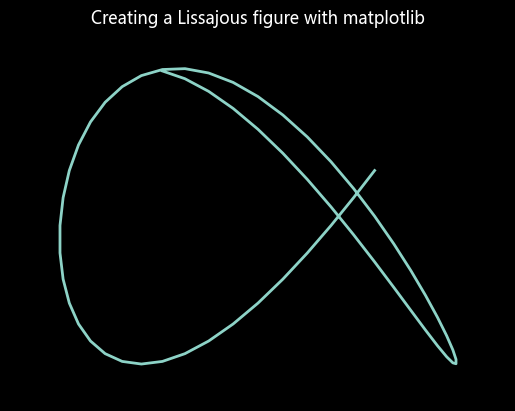

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')
 
fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 
 
# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 
 
# lists to store x and y axis points 
xdata, ydata = [], [] 
 
#simulate ghost effect of oscilloscope
def ghostImage(x,y):
	xdata.append(x)
	ydata.append(y)
	if len(xdata)>60:
		del xdata[0]
		del ydata[0]
	return xdata,ydata
 
# animation function 
def animate(i): 
	# t is a parameter 
	t = i/100.0 
	
	# x, y values to be plotted 
	x = 40*np.sin(2*2*np.pi*(t+0.3)) 
	y = 40*np.cos(3*2*np.pi*t) 
	
	# appending new points to x, y axes points list 
	
	line.set_data(ghostImage(x,y)) 
	return line, 
	
# setting a title for the plot 
plt.title('Creating a Lissajous figure with matplotlib') 
# hiding the axis details 
plt.axis('off') 
 
# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
							frames=400, interval=20, blit=True) 
 
# save the animation as gif file 
anim.save('figure.gif',writer='imagemagick') 

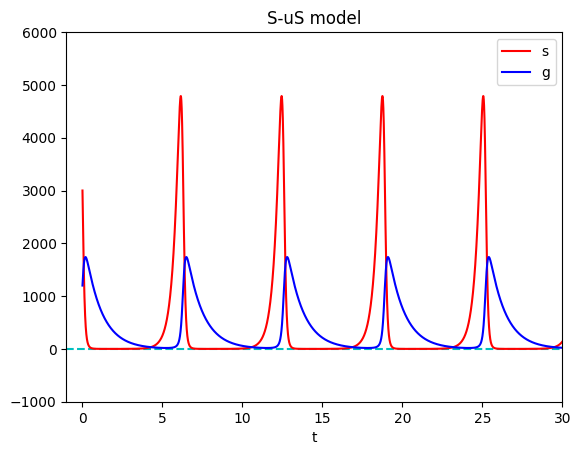

In [ ]:
from scipy.integrate import odeint # 导入 scipy.integrate 模块
import numpy as np # 导入 numpy包
import matplotlib.pyplot as plt # 导入 matplotlib包

def dycon(s,t,a,b,c,d): # 捕食者-被捕食者模型，导数函数
    x,y = s
    dx_dt = a*x - b*x*y
    dy_dt = -d*y + c*x*y 
    return np.array([dx_dt ,dy_dt])
#设置模型参数
numberx = 3000 # 
numbery = 1200 # 
a = 3
b = 0.008
c = 0.002
d = 1
tEnd = 30 # 预测日期长度
t = np.arange(0.0,tEnd,0.001)# (start,stop,step)
s = (numberx,numbery)#微分方程组的初值

#捕食者-被捕食者模型
ycon = odeint(dycon, s, t, args=(a,b,c,d))
#画图
plt.title("S-uS model")
plt.xlabel('t')
plt.axis([-1,tEnd,-1000,6000])
plt.axhline(y=0,ls="--",c='c') # 添加水平直线
plt.plot(t,ycon[:,0],'-r',label='s')
plt.plot(t,ycon[:,1],'-b',label='g')
plt.legend(loc='best') # youcans
plt.show()


In [26]:
import matplotlib.pyplot as plt
from scipy import linspace,exp
from scipy.integrate import odeint
import numpy as np
from numpy import arange
import pandas as pd
from math import *
# 计算阴影损失
ST = [9,10.5,12,13.5,15]
D = [-59,-28,0,30,61,91,122,153,183,214,244,275]
res1 = []
raw_index = [str(i) for i in range(0,12)]
column_index = ['μsb'] 
# A镜坐标
x = -121.368
y = 0
# B镜坐标
x1 = -107.882
y1 = 0
fi = 39.4*(np.pi/180)
for d in D:
    res = 0
    for st in ST:
        w = (np.pi*(st-12))/12
        Sin_sigma = sin((2*np.pi*d)/365)*sin(((2*np.pi)*23.45)/360)
        Cos_sigma = sqrt(1-Sin_sigma**2)
        Sin_alpha = Cos_sigma*cos(fi)*cos(w) + Sin_sigma*sin(fi)
        Cos_alpha = sqrt(1-Sin_alpha**2)
        if w > 0 : # 修正cos_alpha的值
            Cos_alpha=-Cos_alpha
        alpha = acos(Cos_alpha)
        Cos_gama = (Sin_sigma - Sin_alpha*sin(fi))/(Cos_alpha*cos(fi))

        Sin_Eh = Sin_alpha
        Cos_Eh = Cos_alpha
        # print(Cos_gama)
        Sin_Ah = sin(acos(Cos_gama + 0.000000000000002)) # 函数计算产生误差，如果去掉可能导致程序中断
        
        Cos_Ah = Cos_gama
        # 变换矩阵
        T = np.mat([[-Sin_Eh , -Sin_Ah*Cos_Eh , Cos_Ah*Cos_Eh],
                    [Cos_Eh  , -Sin_Ah*Sin_Eh , Cos_Ah*Sin_Eh],
                    [0       , Cos_Ah         ,       Sin_Ah]])
        a = 0
        b = 0 

        for x_1s in range(-60,60):# 遍历整个镜坐标系上的点，看是否有落到另一块镜子上的点
            for y_1s in range(-60,60):
                x_1 = x_1s/50
                y_1 = y_1s/50
                H1 = np.mat([x_1,y_1,0])
                OA = np.mat([[-sqrt(x**2+y**2)],[0],[4]])
                OB = np.mat([[-sqrt(x1**2+y1**2)],[0],[4]])

                H11 = np.dot(T,H1.T)+OA
                H111 = np.dot(T.T,(H11-OB))

                V0 = np.mat([Cos_Eh*Sin_Ah,Cos_Eh*Cos_Ah,Sin_Eh])
                VH = np.dot(T.T,V0.T)# T.T
                # VH = [a,b,c]


                x_2 = (VH[2]*H111[0]-VH[0]*H111[2])/VH[2]
                y_2 = (VH[2]*H111[1]-VH[1]*H111[2])/VH[2]
                # print(x_2[0,0],y_2[0,0])
                if -3<x_2[0,0]<3 and -3<y_2[0,0]<3:
                    a+=1
                b+=1
        res += a/b
        
    res/=5
    res1.append(res)
ans = pd.DataFrame(res1,raw_index,column_index)
ans.to_excel('阴影效率.xlsx')     


In [ ]:
# 计算光锥半径
res = []
raw_index = [str(i) for i in range(106,338)]
column_index = ['光锥半径'] 
for i in range(106,338):
    res.append(tan(0.00465)*sqrt(80**2+i**2))
ans = pd.DataFrame(res,raw_index,column_index)
ans.to_excel('光锥半径.xlsx')   
    

In [ ]:

# 计算μ_at
xydata = pd.read_excel('附件.xlsx')
res = 0
for i in range(0,1745):
    x = xydata.loc[i,'x坐标 (m)']
    y = xydata.loc[i,'y坐标 (m)']
    d_HR = sqrt(80**2+sqrt(x**2+y**2)**2)
    μ_at = 0.99321-0.0001176*d_HR + 1.97e-8*d_HR**2
    res +=μ_at
res/=1744
print(res)

0.9655680914238182


In [ ]:
import matplotlib.pyplot as plt
from scipy import linspace,exp
from scipy.integrate import odeint
import numpy as np
from numpy import arange
import pandas as pd
from math import *
# 计算DNI
xydata = pd.read_excel('附件.xlsx')
fi = 39.4*(np.pi/180)
ST = [9,10.5,12,13.5,15]
D = [-59,-28,0,30,61,91,122,153,183,214,244,275]
res1 = []
raw_index = [str(i) for i in range(0,12)]
column_index = ['DNI'] 
for d in D: # 按月遍历
    res = 0
    for st in ST: # 按天遍历
        w = (np.pi*(st-12))/12
        Sin_sigma = sin((2*np.pi*d)/365)*sin(((2*np.pi)*23.45)/360)
        Cos_sigma = sqrt(1-Sin_sigma**2)
        Sin_alpha = Cos_sigma*cos(fi)*cos(w) + Sin_sigma*sin(fi)
        H = 3
        a = 0.4237 - 0.00821*(6 - H)**2
        b = 0.5055 + 0.00595*(6.5 - H)**2
        c = 0.2711 + 0.01858*(2.5 - H)**2
        DNI = 1.366*(a + b*exp(-c/Sin_alpha))
        res += DNI
    res /= 5
    res1.append(res)
ans = pd.DataFrame(res1,raw_index,column_index)
ans.to_excel('DNI.xlsx')     


In [16]:

import numpy as np
import pandas as pd
from math import *

# 计算余弦损失
xydata = pd.read_excel('附件.xlsx')
fi = radians(39.4)
ST = [9, 10.5, 12, 13.5, 15]
D = [-57, -26, 0, 30, 61, 91, 122, 153, 183, 214, 244, 275]
res1 = []
raw_index = [str(i) for i in range(0, 12)]
column_index = ['Cos_alpha']
for d in D:
    res2 = 0
    for i in range(0, 1745):
        x = xydata.loc[i, 'x坐标 (m)']
        y = xydata.loc[i, 'y坐标 (m)']
        res = 0
        for st in ST:
            w = (np.pi * (st - 12)) / 12
            Sin_sigma = sin((2 * np.pi * d) / 365) * sin(((2 * np.pi) * 23.45) / 360)
            Cos_sigma = sqrt(1 - Sin_sigma ** 2)
            Sin_alpha = Cos_sigma * cos(fi) * cos(w) + Sin_sigma * sin(fi)
            theta = atan(80 / sqrt(x ** 2 + y ** 2))
            Cos_alpha=sqrt(1-Sin_alpha**2)
            if w > 0 : # 修正cos_alpha
                Cos_alpha=-Cos_alpha
            alpha = acos(Cos_alpha)
            if alpha < theta:
                Cos_alpha_1 = cos((theta - alpha) / 2)
            else:
                Cos_alpha_1 = cos((alpha - theta) / 2)
            res += Cos_alpha_1
        res /= 5
        res2 += res
    res2 /= 1744
    res1.append(res2)
ans = pd.DataFrame(res1, raw_index, column_index)
ans.to_excel('余弦.xlsx')


In [42]:

import numpy as np
import pandas as pd
from math import *

column_index1 = ['x','y']
fi_g = (1+sqrt(5))/2
S = []
lens = 0
K = 2338
R1 = int(pow(100 / a, -b)) + 1
for k in range(R1,R1+K): # 从R大于等于100开始生成点阵
    a = 5.75479933 
    b = 5.00000000e-1
    x = a*pow(k,b)*sin(2*pi*(fi_g**(-2))*k)
    y = a*pow(k,b)*cos(2*pi*(fi_g**(-2))*k)
    if 350 > a*pow(k,b) >100: # 判定是否越界
        S.append([x,y])
        lens+=1
raw_index = [str(i) for i in range(0, lens)]
res = pd.DataFrame(S,raw_index,column_index1)
res.to_excel('坐标.xlsx')

    


In [29]:
import numpy as np
from math import *
import random as rd
import matplotlib.pyplot as plt

global flag, K_best, Max, X_best, Y_best, h_best, l1_best, l2_best

DNI = 0.9679964
fi = radians(39.4)
ST = [9, 10.5, 12, 13.5, 15]
D = [-57, -26, 0, 30, 61, 91, 122, 153, 183, 214, 244, 275]
fi_g = (1 + sqrt(5)) / 2
H = 84


def Obj_fun(x):
    """
    定义求解函数
    # K_best =
    # h_best =
    # l1_best =
    # l2_best =
    # a_best =
    # b_best =
    """
    # 在这里填写具体的求解函数逻辑
    # 返回求解函数的值
    Mius = []
    miu_Cos3 = []
    miu_trunc3 = []
    E_ps = []

    K = int(x[0])
    h = x[1]
    l1 = x[2]
    l2 = x[3]
    a = x[4]
    b = x[5]
    X = []
    Y = []
    E = 0
    E1 = 0
    E2 = 0
    S = l1 * l2
    lens1 = 0
    for k in range(int(pow(100 / a, -b)) + 1, int(pow(100 / a, -b)) + 1 + K):  # 是ab的函数
        x1 = a * pow(k, b) * sin(2 * pi * (fi_g ** (-2)) * k)
        y1 = a * pow(k, b) * cos(2 * pi * (fi_g ** (-2)) * k)
        if 350 > a * pow(k, b) > 100:
            X.append(x1)
            Y.append(y1)
            lens1 += 1
    E2 = 0
    # lens是定日镜多少
    for d in D:
        E1 = 0
        miu_Cos2 = 0
        miu_trunc2 = 0
        # for index in range(0, K + 1):
        for index in range(lens1):
            x1 = X[index]
            y1 = Y[index]
            # res = 0
            E = 0
            miu_Cos1 = 0
            miu_trunc1 = 0
            for st in ST:
                w1 = (np.pi * (st - 12)) / 12
                Sin_sigma = sin((2 * np.pi * d) / 365) * sin(((2 * np.pi) * 23.45) / 360)
                Cos_sigma = sqrt(1 - Sin_sigma ** 2)
                Sin_alpha = Cos_sigma * cos(fi) * cos(w1) + Sin_sigma * sin(fi)
                theta = atan((H - h) / sqrt(x1 ** 2 + y1 ** 2))
                alpha = asin(Sin_alpha)
                Cos_alpha = sqrt(1 - Sin_alpha ** 2)
                if w1 > 0:
                    Cos_alpha = -Cos_alpha
                Cos_gama = (Sin_sigma - Sin_alpha * sin(fi)) / (Cos_alpha * cos(fi))
                alpha = acos(Cos_alpha)

                # miu_Cos===========================================
                Cos_alpha_1 = cos((alpha - theta) / 2)
                miu_Cos = Cos_alpha_1

                # miu_at=============================================
                d_HR = sqrt((H - h) ** 2 + x1 ** 2 + y1 ** 2)
                miu_at = 0.99321 - 0.0001176 * d_HR + 1.97e-8 * d_HR ** 2

                # miu_trunc==========================================
                R = tan(4.65e-3 * sqrt(x1 ** 2 + y1 ** 2 + (H - h) ** 2))
                if R < 3.5:
                    miu_trunc = 1
                elif 3.5 <= R <= 4:
                    Sin_0 = sqrt(1 - (3.5 / R) ** 2)
                    miu_trunc = ((pi * (R ** 2)) - 2 * (
                            ((2 * asin(Sin_0)) / (2 * pi)) * pi * (R ** 2) - Sin_0 * R * 3.5)) / (pi * (R ** 2))
                else:
                    miu_trunc = 56 / (pi * (R ** 2))

                # miu================================================
                miu = miu_Cos * 0.92 * miu_at * miu_trunc * 1  # 阴影损失不计

                # 总功率==============================================
                E += miu * S  #
                miu_Cos1 += miu_Cos
                miu_trunc1 += miu_trunc
            E /= 5  # E是 一天的 面积*效率=有效面积
            E1 += E  # E1可以表示累计K块累计数值
            miu_Cos1 /= 5
            miu_Cos2 += miu_Cos1
            miu_trunc2 += miu_trunc1
        E2 += E1  # K块每月的累计数值
        Miu = E1 / (S * K)
        E_p = Miu * DNI
        E_ps.append(E_p)
        miu_Cos3.append(miu_Cos2 / K)
        miu_trunc3.append(miu_trunc2 / K)
        Mius.append(Miu)
    E2 /= 12  # 变成了每个月平均的——年平均
    E2 *= DNI  # 总输出功率

    # 存储数据
    column_index1 = ['data']
    raw_index = [str(i) for i in range(0, 12)]

    res1 = pd.DataFrame(Mius,raw_index,column_index1)
    res1.to_excel('问题2光学效率.xlsx')
    res2 = pd.DataFrame(miu_Cos3,raw_index,column_index1)
    res2.to_excel('问题2余弦效率.xlsx')
    res3 = pd.DataFrame(E_ps,raw_index,column_index1)
    res3.to_excel('问题2E.xlsx')
    res4 = pd.DataFrame(miu_trunc3,raw_index,column_index1)
    res4.to_excel('问题2截断效率.xlsx')

    return E2  # 如果大于 没事，如果小于，则惩罚


x = [2.33884594e+3, 4.00879321, 6.50974926, 6.86401496,
     5.75479933, 5.00e-1]
Obj_fun(x)


61721.82937549284

In [43]:

import numpy as np
import pandas as pd
from math import *

# 可视化太阳高度角
fi = radians(39.4)
ST = [9, 10.5, 12, 13.5, 15]
D = [-57, -26, 0, 30, 61, 91, 122, 153, 183, 214, 244, 275]
res = []
res2 = []
res3 = []
raw_index = [str(i) for i in range(0, 12)]
column_index = ['9','10.5','12','13.5','15']
for d in D:
    # for i in range(0, 1745):
        # x = xydata.loc[i, 'x坐标 (m)']
        # y = xydata.loc[i, 'y坐标 (m)']
    res = []
    for st in ST:
        w = (np.pi * (st - 12)) / 12
        Sin_sigma = sin((2 * np.pi * d) / 365) * sin(((2 * np.pi) * 23.45) / 360)
        Cos_sigma = sqrt(1 - Sin_sigma ** 2)
        Sin_alpha = Cos_sigma * cos(fi) * cos(w) + Sin_sigma * sin(fi)
        Cos_gama = (Sin_sigma - Sin_alpha * sin(fi)) / (Cos_alpha * cos(fi))
        res.append(Cos_gama)
    res2.append(res)
res3.append(res2)
ans = pd.DataFrame(res2, raw_index, column_index)
ans.to_excel('gama.xlsx')


In [40]:
import numpy as np
from math import *
import random as rd
import matplotlib.pyplot as plt

global flag, K_best, Max, X_best, Y_best, h_best, l1_best, l2_best

DNI = 0.9679964
fi = radians(39.4)
ST = [9, 10.5, 12, 13.5, 15]
D = [-57, -26, 0, 30, 61, 91, 122, 153, 183, 214, 244, 275]
fi_g = (1 + sqrt(5)) / 2
H = 84
# 求解解的阴影效率

def Obj_fun(x):
    """
    定义求解函数
    # K_best =
    # h_best =
    # l1_best =
    # l2_best =
    # a_best =
    # b_best =
    """
    # 在这里填写具体的求解函数逻辑
    # 返回求解函数的值

    K = int(x[0])
    h = x[1]
    l1 = x[2]
    l2 = x[3]
    a = x[4]
    b = x[5]
    X = []
    Y = []
    E = 0
    E1 = 0
    E2 = 0
    S = l1 * l2
    lens1 = 0
    for k in range(int(pow(100 / a, -b)) + 1, int(pow(100 / a, -b)) + 1 + K):  # 是ab的函数
        x1 = a * pow(k, b) * sin(2 * pi * (fi_g ** (-2)) * k)
        y1 = a * pow(k, b) * cos(2 * pi * (fi_g ** (-2)) * k)
        if 350 > a * pow(k, b) > 100:
            X.append(x1)
            Y.append(y1)
            lens1 += 1
    E2 = 0
    
    block2 = []
    # lens是定日镜多少
    for d in D:
        block1 = 0
        # for index in range(0, K + 1):
        for index in range(lens1):
            x1 = X[index]
            y1 = Y[index]
            r = sqrt(x1**2+y1**2)
            if a!=0:
                k1 = pow(r/a,-b)
            else:
                break 
            k2 = fi_g ** 2 + k1
            k3 = k2 + 1
            x2 = a * pow(k, b) * sin(2 * pi * (fi_g ** (-2)) * k2)
            y2 = a * pow(k, b) * cos(2 * pi * (fi_g ** (-2)) * k2)
            x3 = a * pow(k, b) * sin(2 * pi * (fi_g ** (-2)) * k3)
            y3 = a * pow(k, b) * cos(2 * pi * (fi_g ** (-2)) * k3)
            # res = 0
            E = 0
            miu_Cos1 = 0
            block = 0
            for st in ST:
                w1 = (np.pi * (st - 12)) / 12
                Sin_sigma = sin((2 * np.pi * d) / 365) * sin(((2 * np.pi) * 23.45) / 360)
                Cos_sigma = sqrt(1 - Sin_sigma ** 2)
                Sin_alpha = Cos_sigma * cos(fi) * cos(w1) + Sin_sigma * sin(fi)
                theta = atan((H - h) / sqrt(x1 ** 2 + y1 ** 2))
                alpha = asin(Sin_alpha)
                Cos_alpha = sqrt(1 - Sin_alpha ** 2)
                if w1 > 0:
                    Cos_alpha = -Cos_alpha
                Cos_gama = (Sin_sigma - Sin_alpha * sin(fi)) / (Cos_alpha * cos(fi))
                Sin_Eh = Sin_alpha
                Cos_Eh = Cos_alpha
                # print(Cos_gama)
                Sin_Ah = sin(acos(Cos_gama + 0.000000000000002))  # 函数计算产生误差，如果去掉可能导致程序中断

                Cos_Ah = Cos_gama

                T = np.mat([[-Sin_Eh, -Sin_Ah * Cos_Eh, Cos_Ah * Cos_Eh],
                            [Cos_Eh, -Sin_Ah * Sin_Eh, Cos_Ah * Sin_Eh],
                            [0, Cos_Ah, Sin_Ah]])
                a = 0
                b = 0

                for x_1s in range(-30, 30):
                    for y_1s in range(-30, 30):
                        x_1 = x_1s / 10
                        y_1 = y_1s / 10
                        H1 = np.mat([x_1, y_1, 0])
                        OA = np.mat([[-sqrt(x1 ** 2 + y1 ** 2)], [0], [4]])
                        OB = np.mat([[-sqrt(x2 ** 2 + y2 ** 2)], [0], [4]])

                        OC = np.mat([[-sqrt(x3 ** 2 + y3 ** 2)], [0], [4]])

                        H11 = np.dot(T, H1.T) + OA
                        H111 = np.dot(T.T, (H11 - OB))
                        H222 = np.dot(T.T, (H11 - OC))

                        V0 = np.mat([Cos_Eh * Sin_Ah, Cos_Eh * Cos_Ah, Sin_Eh])
                        # print("999")
                        VH = np.dot(T.T, V0.T)  # T.T
                        # print("111")
                        # VH = [a,b,c]
                        # print(VH)
                        # print(H111)

                        x_2 = (VH[2] * H111[0] - VH[0] * H111[2]) / VH[2]
                        y_2 = (VH[2] * H111[1] - VH[1] * H111[2]) / VH[2]

                        x_3 = (VH[2] * H222[0] - VH[0] * H222[2]) / VH[2]
                        y_3 = (VH[2] * H222[1] - VH[1] * H222[2]) / VH[2]
                        # print(x_2[0,0],y_2[0,0])
                        if -3 < x_2[0, 0] < 3 and -3 < y_2[0, 0] < 3:
                            a += 1
                        b += 1
                        if -3 < x_3[0, 0] < 3 and -3 < y_3[0, 0] < 3:
                            a += 1
                        b += 1
                block += a / b
                alpha = acos(Cos_alpha)

                # # miu_Cos===========================================
                # Cos_alpha_1 = cos((alpha - theta) / 2)
                # miu_Cos = Cos_alpha_1

                # # miu_at=============================================
                # d_HR = sqrt((H - h) ** 2 + x1 ** 2 + y1 ** 2)
                # miu_at = 0.99321 - 0.0001176 * d_HR + 1.97e-8 * d_HR ** 2

                # # miu_trunc==========================================
                # R = tan(4.65e-3 * sqrt(x1 ** 2 + y1 ** 2 + (H - h) ** 2))
                # if R < 3.5:
                #     miu_trunc = 1
                # elif 3.5 <= R <= 4:
                #     Sin_0 = sqrt(1 - (3.5 / R) ** 2)
                #     miu_trunc = ((pi * (R ** 2)) - 2 * (
                #             ((2 * asin(Sin_0)) / (2 * pi)) * pi * (R ** 2) - Sin_0 * R * 3.5)) / (pi * (R ** 2))
                # else:
                #     miu_trunc = 56 / (pi * (R ** 2))

                # miu================================================
                # miu = miu_Cos * 0.92 * miu_at * miu_trunc * 1  # 阴影损失不计

                # 总功率==============================================
                # E += miu * S  #

            # E /= 5  # E是 一天的 面积*效率=有效面积
            # E1 += E  # E1可以表示累计K块累计数值
            block /= 5
            block1+=block
        # E2 += E1  # K块每月的累计数值
        block1/=K
        block2.append(block1)
    # E2 /= 12  # 变成了每个月平均的——年平均
    # E2 *= DNI  # 总输出功率
    raw_index = [str(i) for i in range(0, 12)]
    column_index = ['阴影效率']
    ans = pd.DataFrame(block2, raw_index, column_index)
    ans.to_excel('alpha.xlsx')


    return E2  # 如果大于 没事，如果小于，则惩罚


x = [3.09924110e+3, 6, 5.000923, 6.80, 5.038640, 5e-1] 
Obj_fun(x)


0

In [48]:
import numpy as np
from math import *
import random as rd
import pandas as pd

global flag, K_best, Max, X_best, Y_best, h_best, l1_best, l2_best, res

DNI = 0.9679964
fi = radians(39.4)
ST = [9, 10.5, 12, 13.5, 15]
D = [-57, -26, 0, 30, 61, 91, 122, 153, 183, 214, 244, 275]
fi_g = (1 + sqrt(5)) / 2
H = 84


def check(k1, k2, a, b, l2):
    x1 = a * pow(k1, b) * sin(2 * pi * (fi_g ** (-2)) * k1)
    y1 = a * pow(k1, b) * cos(2 * pi * (fi_g ** (-2)) * k1)
    x2 = a * pow(k2, b) * sin(2 * pi * (fi_g ** (-2)) * k2)
    y2 = a * pow(k2, b) * cos(2 * pi * (fi_g ** (-2)) * k2)
    # check现在的目的是算阴影遮挡面积

    res1 = 0
    for d in D:
        res0 = 0
        for st in ST:
            ws = (np.pi * (st - 12)) / 12
            Sin_sigma = sin((2 * np.pi * d) / 365) * sin(((2 * np.pi) * 23.45) / 360)
            Cos_sigma = sqrt(1 - Sin_sigma ** 2)
            Sin_alpha = Cos_sigma * cos(fi) * cos(ws) + Sin_sigma * sin(fi)
            Cos_alpha = sqrt(1 - Sin_alpha ** 2)
            if ws > 0:
                Cos_alpha = -Cos_alpha
            alpha = acos(Cos_alpha)
            Cos_gama = (Sin_sigma - Sin_alpha * sin(fi)) / (Cos_alpha * cos(fi))

            Sin_Eh = Sin_alpha
            Cos_Eh = Cos_alpha
            # print(Cos_gama)
            Sin_Ah = sin(acos(Cos_gama + 0.000000000000002))  # 函数计算产生误差，如果去掉可能导致程序中断

            Cos_Ah = Cos_gama

            T = np.mat([[-Sin_Eh, -Sin_Ah * Cos_Eh, Cos_Ah * Cos_Eh],
                        [Cos_Eh, -Sin_Ah * Sin_Eh, Cos_Ah * Sin_Eh],
                        [0, Cos_Ah, Sin_Ah]])
            a = 0
            b = 0

            for x_1s in range(-30, 30):
                for y_1s in range(-30, 30):
                    x_1 = x_1s / 10
                    y_1 = y_1s / 10
                    H1 = np.mat([x_1, y_1, 0])
                    OA = np.mat([[-sqrt(x1 ** 2 + y1 ** 2)], [0], [4]])
                    OB = np.mat([[-sqrt(x2 ** 2 + y2 ** 2)], [0], [4]])

                    H11 = np.dot(T, H1.T) + OA
                    H111 = np.dot(T.T, (H11 - OB))

                    V0 = np.mat([Cos_Eh * Sin_Ah, Cos_Eh * Cos_Ah, Sin_Eh])
                    VH = np.dot(T.T, V0.T)  # T.T

                    x_2 = (VH[2] * H111[0] - VH[0] * H111[2]) / VH[2]
                    y_2 = (VH[2] * H111[1] - VH[1] * H111[2]) / VH[2]
                    # print(x_2[0,0],y_2[0,0])
                    if -3 < x_2[0, 0] < 3 and -3 < y_2[0, 0] < 3:
                        a += 1
                    b += 1
            res0 += a / b
        res0 /= 5
        res1 += res0
    res1 /= 12

    return res1


def Obj_fun(x, E2):
    """
    定义求解函数
    # K_best =
    # h_best =
    # l1_best =
    # l2_best =
    # a_best =
    # b_best =
    """
    # 在这里填写具体的求解函数逻辑
    # 返回求解函数的值
    K = 3099
    l1 = 5
    l2 = 6.8
    return E2 / (l1 * l2 * K)  # 越大越好，正向的


def eq_constraintE2(x):
    global res
    global K
    K = 3099
    h = 6
    l1 = 5
    l2 = 6.8
    global a
    a = 5.03
    global b
    b = 0.5
    X = []
    Y = []
    res = 0
    add1 = x[0]
    add2 = x[1]
    add3 = x[2]
    lens1 = 0
    for k in range(int(pow(100 / a, -b)) + 1, int(pow(100 / a, -b)) + 1 + K):  # 是ab的函数
        x1 = a * pow(k, b) * sin(2 * pi * (fi_g ** (-2)) * k)
        y1 = a * pow(k, b) * cos(2 * pi * (fi_g ** (-2)) * k)
        if 350 > a * pow(k, b) > 100:
            X.append(x1)
            Y.append(y1)
            lens1 += 1
    E2 = 0
    # lens是定日镜多少
    for d in D:
        E1 = 0
        # for index in range(0, K + 1):
        for index in range(lens1):

            x1 = X[index]
            y1 = Y[index]
            E = 0
            for st in ST:
                w1 = (np.pi * (st - 12)) / 12
                Sin_sigma = sin((2 * np.pi * d) / 365) * sin(((2 * np.pi) * 23.45) / 360)
                Cos_sigma = sqrt(1 - Sin_sigma ** 2)
                Sin_alpha = Cos_sigma * cos(fi) * cos(w1) + Sin_sigma * sin(fi)
                theta = atan((H - (h + index * add1)) / sqrt(x1 ** 2 + y1 ** 2))
                alpha = asin(Sin_alpha)
                Cos_alpha = sqrt(1 - Sin_alpha ** 2)
                if w1 > 0:
                    Cos_alpha = -Cos_alpha
                Cos_gama = (Sin_sigma - Sin_alpha * sin(fi)) / (Cos_alpha * cos(fi))
                alpha = acos(Cos_alpha)

                # miu_Cos===========================================
                Cos_alpha_1 = cos((alpha - theta) / 2)
                miu_Cos = Cos_alpha_1

                # miu_at=============================================
                d_HR = sqrt((H - (h + index * add1)) ** 2 + x1 ** 2 + y1 ** 2)
                miu_at = 0.99321 - 0.0001176 * d_HR + 1.97e-8 * d_HR ** 2

                # miu_trunc==========================================
                R = tan(4.65e-3 * sqrt(x1 ** 2 + y1 ** 2 + (H - (h + index * add1)) ** 2))
                if R < 3.5:
                    miu_trunc = 1
                elif 3.5 <= R <= 4:
                    Sin_0 = sqrt(1 - (3.5 / R) ** 2)
                    miu_trunc = ((pi * (R ** 2)) - 2 * (
                            ((2 * asin(Sin_0)) / (2 * pi)) * pi * (R ** 2) - Sin_0 * R * 3.5)) / (pi * (R ** 2))
                else:
                    miu_trunc = 56 / (pi * (R ** 2))

                # miu================================================
                k1 = int(fi_g ** 2) + 1
                res = check(k1, k1 + 1, a, b, l2 + index * add3)

                miu = miu_Cos * 0.92 * miu_at * miu_trunc * (1 - res)  # 阴影损失

                # 总功率==============================================
                E += miu * (l1 + index * add2) * (l2 + index * add3)  #
            E /= 5  # E是 一天的 面积*效率=有效面积
            E1 += E  # E1可以表示累计K块累计数值
        E2 += E1  # K块每月的累计数值
    E2 /= 12  # 变成了每个月平均的——年平均
    E2 *= DNI  # 总输出功率
    return E2  # 如果大于 没事，如果小于，则惩罚


def penalty_function(x):
    """
    罚函数法，将不满足约束条件的解进行惩罚
    Args:
        x (np.array): 变量数组

    Returns:
        float: 目标函数值（带罚函数）
    """
    penalty = -10000  # 罚函数系数
    g1 = eq_constraintE2(x)  # 等式约束
    test1 = g1 - 60000  # 如果》65000也不行，结果是test1>5000

    # k
    if test1 < 0 or test1 > 5000:
        return Obj_fun(x, g1) + penalty * test1 * test1  # 使用二次惩罚函数
    # 怎么办？需要k-具体index，所以必须放在那边，如果不满足进行什么操作？对于现在迭代到的这个值，l2
    #
    else:
        return Obj_fun(x, g1)


def PSO(n, c1, c2, w, K, vmax, x_lb, x_ub):
    """
    粒子群算法
    Args:
        n (int): 粒子数量
        c1 (float): 每个粒子的个体学习因子
        c2 (float): 每个粒子的社会学习因子
        w (float): 惯性权重
        K (int): 迭代次数
        v_max (float or np.array): 粒子的最大速度
        x_lb (float or np.array): x的下界
        x_ub (float or np.array): x的上界
    Returns:
        np.array: 最优解的位置
    """

    narvs = len(x_lb)  # 变量个数
    x = np.random.uniform(x_lb, x_ub, size = (n, narvs))  # 初始化粒子的位置和速度
    v = np.random.uniform(-vmax, vmax, size = (n, narvs))

    pbest = x.copy()  # 初始化每个粒子的最佳位置和全局最佳位置
    fit = np.zeros(n)
    for i in range(n):
        fit[i] = penalty_function(x[i])

    ind = np.argmax(fit)
    gbest = x[ind].copy()

    fitnessbest = np.zeros(K)  # 迭代更新
    for d in range(K):
        for i in range(n):
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            v[i] = np.clip(v[i], -vmax, vmax)

            x[i] = x[i] + v[i]
            x[i] = np.clip(x[i], x_lb, x_ub)

            # 在这里根据当前结果动态调整变量个数
            current_narvs = len(x[i])  # 当前变量个数
            if current_narvs < narvs:  # 变量个数减少时，删除多余的变量
                x[i] = np.delete(x[i], np.s_[current_narvs:narvs])
            elif current_narvs > narvs:  # 变量个数增加时，扩展变量并随机初始化新增的变量
                extra_vars = np.random.uniform(x_lb[narvs:], x_ub[narvs:])  # 随机初始化新增的变量
                x[i] = np.append(x[i], extra_vars)

            fit[i] = penalty_function(x[i])

            if fit[i] > penalty_function(pbest[i]):  # 如果这个粒子适应度大于目前最大适应度，则这个粒子的适应度作为最大适应度
                pbest[i] = x[i]

            if fit[i] > penalty_function(gbest):
                gbest = pbest[i]

        fitnessbest[d] = penalty_function(gbest)

    x_axis_data = [i for i in range(len(fitnessbest))]  # x
    y_axis_data = fitnessbest  # y
    print(fitnessbest)

    return gbest


# 参数设置
n = 10  # 粒子数量
c1 = 2.0  # 每个粒子的个体学习因子
c2 = 2.0  # 每个粒子的社会学习因子
w = 0.9  # 惯性权重
K = 20  # 迭代次数
# vmax = 1.2  # 粒子的最大速度！！！
vmax = np.array([0.0002 / 5, 0.0002 / 5, 0.0002 / 5])
x_lb = np.array([-0.0001, -0.0001, -0.0001])  # x的下界
x_ub = np.array([0.0001, 0.0001, 0.0001])  # x的上界
# K_best =
# h_best =
# l1_best =
# l2_best =
# a_best =
# b_best =

# 调用粒子群算法
best_solution = PSO(n, c1, c2, w, K, vmax, x_lb, x_ub)

print("最佳的位置是：", best_solution)
print("此时最优值是：", penalty_function(best_solution))


KeyboardInterrupt: 

In [51]:
import numpy as np
from math import *
import random as rd
import matplotlib.pyplot as plt

global flag, K_best, Max, X_best, Y_best, h_best, l1_best, l2_best

DNI = 0.967
fi = radians(39.4)
ST = [9, 10.5, 12, 13.5, 15]
D = [-57, -26, 0, 30, 61, 91, 122, 153, 183, 214, 244, 275]
fi_g = (1 + sqrt(5)) / 2
H = 84


def check(k1, k2, a, b, l2):
    x1 = a * pow(k1, b) * sin(2 * pi * (fi_g ** (-2)) * k1)
    y1 = a * pow(k1, b) * cos(2 * pi * (fi_g ** (-2)) * k1)
    x2 = a * pow(k2, b) * sin(2 * pi * (fi_g ** (-2)) * k2)
    y2 = a * pow(k2, b) * cos(2 * pi * (fi_g ** (-2)) * k2)
    if (x2 - x1) ** 2 + (y2 - y1) ** 2 <= 5 + l2:
        return 0
    else:
        return 1


def check_ab(a, b, l2):
    k = int(pow(100 / a, -b)) + 1
    # theta = 2 * pow(fi_g, -2) * k * pi
    k1 = fi_g ** 2
    k2 = k1 + 1
    if check(k1 + k, k, a, b, l2) and check(k2 + k, k, a, b, l2) and check(k + 1, k, a, b, l2):
        return 1
    else:
        return 0


def Obj_fun(x, E2):
    """
    定义求解函数
    # K_best =
    # h_best =
    # l1_best =
    # l2_best =
    # a_best =
    # b_best =
    """
    # 在这里填写具体的求解函数逻辑
    # 返回求解函数的值
    K = int(x[0])
    l1 = x[2]
    l2 = x[3]
    return E2 / (l1 * l2 * K)  # 越大越好，正向的


def eq_constraintE2(x):
    K = int(x[0])
    h = x[1]
    a = x[4]
    b = x[5]
    x_1 = x[6]
    x_2 = x[7]
    x_3 = x[8]
    X = []
    Y = []
    lens1 = 0
    for k in range(int(pow(100 / a, -b)) + 1, int(pow(100 / a, -b)) + 1 + K):  # 是ab的函数
        x1 = a * pow(k, b) * sin(2 * pi * (fi_g ** (-2)) * k)
        y1 = a * pow(k, b) * cos(2 * pi * (fi_g ** (-2)) * k)
        if 350 > a * pow(k, b) > 100:
            X.append(x1)
            Y.append(y1)
            lens1 += 1
    E2 = 0
    # lens是定日镜多少
    for d in D:
        E1 = 0
        l1 = x[2]
        l2 = x[3]
        # for index in range(0, K + 1):
        for index in range(lens1):
            x1 = X[index]
            y1 = Y[index]
            if index % 1000 > 1:
                l1 += (index/1000) * x_2
                l2 += (index/1000) * x_3
                h += (index/1000) * x_1
            # res = 0
            E = 0
            for st in ST:
                w1 = (np.pi * (st - 12)) / 12
                Sin_sigma = sin((2 * np.pi * d) / 365) * sin(((2 * np.pi) * 23.45) / 360)
                Cos_sigma = sqrt(1 - Sin_sigma ** 2)
                Sin_alpha = Cos_sigma * cos(fi) * cos(w1) + Sin_sigma * sin(fi)
                theta = atan((H - h) / sqrt(x1 ** 2 + y1 ** 2))
                Cos_alpha = sqrt(1 - Sin_alpha ** 2)
                if w1 > 0:
                    Cos_alpha = -Cos_alpha
                alpha = acos(Cos_alpha)

                # miu_Cos===========================================
                Cos_alpha_1 = cos((alpha - theta) / 2)
                miu_Cos = Cos_alpha_1

                # miu_at=============================================
                d_HR = sqrt((H - h) ** 2 + x1 ** 2 + y1 ** 2)
                miu_at = 0.99321 - 0.0001176 * d_HR + 1.97e-8 * d_HR ** 2

                # miu_trunc==========================================
                R = tan(4.65e-3 * sqrt(x1 ** 2 + y1 ** 2 + (H - h) ** 2))
                if R < 3.5:
                    miu_trunc = 1
                elif 3.5 <= R <= 4:
                    Sin_0 = sqrt(1 - (3.5 / R) ** 2)
                    miu_trunc = ((pi * (R ** 2)) - 2 * (
                            ((2 * asin(Sin_0)) / (2 * pi)) * pi * (R ** 2) - Sin_0 * R * 3.5)) / (pi * (R ** 2))
                else:
                    miu_trunc = 56 / (pi * (R ** 2))

                # miu================================================
                miu = miu_Cos * 0.92 * miu_at * miu_trunc * 0.98  # 阴影损失0.98

                # 总功率==============================================
                S = l1 * l2
                E += miu * S  #
            E /= 5  # E是 一天的 面积*效率=有效面积
            E1 += E  # E1可以表示累计K块累计数值
        E2 += E1  # K块每月的累计数值
    E2 /= 12  # 变成了每个月平均的——年平均
    E2 *= DNI  # 总输出功率
    return E2  # 如果大于 没事，如果小于，则惩罚


def eq_constraintElse(x):
    h = x[1]
    l1 = x[2]
    l2 = x[3]
    a = x[4]
    b = x[5]
    if check_ab(a, b, l2) and (l1 < l2) and (h > l1 / 2):
        return 1  # 1说明是好事
    else:
        return 0


def penalty_function(x):
    """
    罚函数法，将不满足约束条件的解进行惩罚
    Args:
        x (np.array): 变量数组

    Returns:
        float: 目标函数值（带罚函数）
    """
    penalty = -10000  # 罚函数系数
    g1 = eq_constraintE2(x)  # 等式约束
    test1 = g1 - 60000  # 如果》65000也不行，结果是test1>5000

    test2 = eq_constraintElse(x)
    if test1 < 0 or test1 > 5000 or test2 == 0:
        return Obj_fun(x, g1) + penalty * test1 * test1  # 使用二次惩罚函数
    else:
        return Obj_fun(x, g1)


def PSO(n, c1, c2, w, Ks, vmax, x_lb, x_ub):
    """
    粒子群算法
    Args:
        n (int): 粒子数量
        c1 (float): 每个粒子的个体学习因子
        c2 (float): 每个粒子的社会学习因子
        w (float): 惯性权重
        K (int): 迭代次数
        v_max (float or np.array): 粒子的最大速度
        x_lb (float or np.array): x的下界
        x_ub (float or np.array): x的上界
    Returns:
        np.array: 最优解的位置
    """

    narvs = len(x_lb)  # 变量个数
    x = np.random.uniform(x_lb, x_ub, size = (n, narvs))  # 初始化粒子的位置和速度
    v = np.random.uniform(-vmax, vmax, size = (n, narvs))

    pbest = x.copy()  # 初始化每个粒子的最佳位置和全局最佳位置
    fit = np.zeros(n)
    for i in range(n):
        fit[i] = penalty_function(x[i])

    ind = np.argmax(fit)
    gbest = x[ind].copy()

    fitnessbest = np.zeros(Ks)  # 迭代更新
    for d in range(Ks):
        for i in range(n):
            C = c1 + c2
            Fai = 2 / abs(2 - C - sqrt(C ** 2 - 4 * C))
            v[i] = Fai * (w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i]))
            v[i] = np.clip(v[i], -vmax, vmax)

            x[i] = x[i] + v[i]
            x[i] = np.clip(x[i], x_lb, x_ub)

            # 在这里根据当前结果动态调整变量个数
            current_narvs = len(x[i])  # 当前变量个数
            if current_narvs < narvs:  # 变量个数减少时，删除多余的变量
                x[i] = np.delete(x[i], np.s_[current_narvs:narvs])
            elif current_narvs > narvs:  # 变量个数增加时，扩展变量并随机初始化新增的变量
                extra_vars = np.random.uniform(x_lb[narvs:], x_ub[narvs:])  # 随机初始化新增的变量
                x[i] = np.append(x[i], extra_vars)

            fit[i] = penalty_function(x[i])

            if fit[i] > penalty_function(pbest[i]):  # 如果这个粒子适应度大于目前最大适应度，则这个粒子的适应度作为最大适应度
                pbest[i] = x[i]

            if fit[i] > penalty_function(gbest):
                gbest = pbest[i]

        fitnessbest[d] = penalty_function(gbest)

    # x_axis_data = [i for i in range(len(fitnessbest))]  # x
    # y_axis_data = fitnessbest  # y
    # print(fitnessbest)
    #
    # plt.plot(x_axis_data, y_axis_data, 'b*--', alpha = 0.5, linewidth = 1, label = 'acc')
    # plt.legend()  # 显示上面的label
    # plt.xlabel('time')  # x_label
    # plt.ylabel('number')  # y_label
    #
    # plt.ylim(-2, 2)  # 仅设置y轴坐标范围
    # plt.show()

    return gbest


# 参数设置
n = 20  # 粒子数量
c1 = 2.05  # 每个粒子的个体学习因子
c2 = 2.05  # 每个粒子的社会学习因子
w = 0.9  # 惯性权重
Ks = 10  # 迭代次数
# vmax = 1.2  # 粒子的最大速度！！！
vmax = np.array([195, 0.8, 1.2, 1.2, 1.2, 0.06, 0.02 / 5, 0.02 / 5, 0.02 / 5])
x_lb = np.array([1700, 2, 2, 2, 2, 0.5, -0.01, -0.01, -0.01])  # x的下界
x_ub = np.array([3000, 6, 8, 8, 8, 0.8, 0.01, 0.01, 0.01])  # x的上界
# K_best =
# h_best =
# l1_best =
# l2_best =
# a_best =
# b_best =

# 调用粒子群算法
best_solution = PSO(n, c1, c2, w, Ks, vmax, x_lb, x_ub)

print("最佳的位置是：", best_solution)
print("此时最优值是：", penalty_function(best_solution))


最佳的位置是： [ 2.49181619e+03  3.93880057e+00  6.40823013e+00  6.90213039e+00
  4.59460473e+00  5.73063831e-01 -8.54384864e-03  5.57301247e-03
  9.39015568e-04]
此时最优值是： 0.5852018543803607
